In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models
from keras.utils import to_categorical
import itertools

from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

D:\Anaconda3\envs\speech5p310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
def convert_to_mel_spectrogram(file_path):
  y, sr = librosa.load(file_path, sr=None)

  # Convert to Mel spectrogram
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

  # Convert to log scale (dB)
  mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
  return mel_spectrogram_db, sr

def plotting_mel_spectogram(spectrogram, sr):
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel Spectrogram')
  plt.tight_layout()
  plt.show()

def get_spectrogram_plot(file_path):
  spectrogram, sr = convert_to_mel_spectrogram(file_path)
  plotting_mel_spectogram(spectrogram, sr)

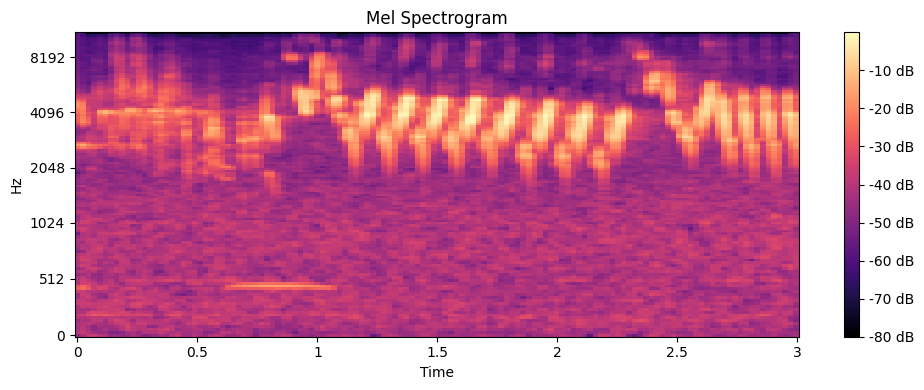

In [3]:
import os
import librosa

directory_path = './wavfiles/'
files = os.listdir(directory_path)

for file in files:
    # Check if the file is a wav file
    if file.endswith('.wav'):
        get_spectrogram_plot(f"./wavfiles/{file}")
        break

def get_spectrogram_plot(file_path):
    spectrogram, sr = convert_to_mel_spectrogram(file_path)
    plotting_mel_spectogram(spectrogram, sr)

def convert_to_mel_spectrogram(file_path):
    y, sr = librosa.load(file_path, sr=None)
    # Convert to Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    return mel_spectrogram, sr

def plotting_mel_spectogram(spectrogram, sr):
    # Add your plotting code here
    pass

In [4]:
metadata = pd.read_csv("./bird_songs_metadata.csv")

In [5]:
metadata.shape

(5422, 18)

In [6]:
metadata.head(10)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [7]:
librosa_audio_data, librosa_sample_rate = librosa.load('./wavfiles/11713-1.wav')
print(librosa_audio_data)
print(librosa_sample_rate)

[ 0.15442057 -0.2753804  -0.5479337  ...  0.06947865  0.03835445
 -0.06795005]
22050


In [8]:
librosa_audio_data.shape

(66150,)

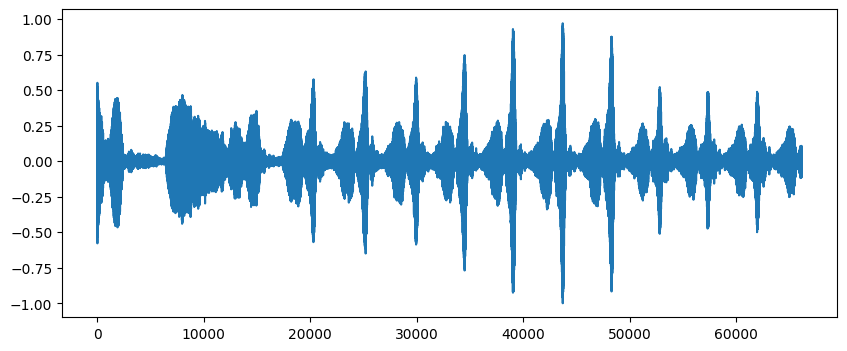

In [9]:
plt.figure(figsize=(10,4))
plt.plot(librosa_audio_data)

In [10]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc = 39)
mfccs.shape

(39, 130)

In [11]:
def get_mfcc_features(file_path):
  y, sr = librosa.load(file_path)
  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=39)
  scaled_features = np.mean(mfccs.T, axis=0)
  return scaled_features

In [12]:
from tqdm import tqdm

features_and_labels = []
for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    file_name = "./wavfiles/" + row['filename']
    labels = row['name']
    scaled_features_each = get_mfcc_features(file_name)
    features_and_labels.append([scaled_features_each, labels])

100%|██████████| 5422/5422 [00:29<00:00, 185.68it/s]


In [13]:
features_and_labels_df = pd.DataFrame(features_and_labels, columns=['features', 'labels'])
features_and_labels_df

,features,labels
0,"[-132.85225, 81.1399, 17.018225, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.11881, 1....",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",Bewick's Wren
...,...,...
5417,"[-265.4909, 25.234486, -71.860214, 21.496227, ...",Northern Cardinal
5418,"[-229.15498, 6.058426, -86.364815, 31.295118, ...",Northern Cardinal
5419,"[-228.50348, 9.504912, -82.23682, 27.831066, 7...",Northern Cardinal
5420,"[-222.64116, 13.23448, -77.96408, 26.501926, 1...",Northern Cardinal


In [14]:
X = np.array(features_and_labels_df['features'].tolist())
Y = np.array(features_and_labels_df['labels'].tolist())

In [15]:
print(X.shape)
print(Y.shape)

(5422, 39)
(5422,)


In [16]:
y = np.array(pd.get_dummies(Y))
y = y.astype(int)

In [17]:
def get_species_name(output_array, main_array=y):
    for i in range(len(main_array)):
        if np.array_equal(main_array[i], output_array):
            return Y[i]
    return None

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:


model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(y_train.shape[1], activation='softmax')
])




In [21]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               20480     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [23]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=0.00001)


In [24]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[lr_reduction])


Epoch 1/1000
109/109 [==============================] - 2s 6ms/step - loss: 2.7847 - accuracy: 0.2854 - val_loss: 1.9978 - val_accuracy: 0.4827 - lr: 0.0010
Epoch 2/1000
109/109 [==============================] - 0s 3ms/step - loss: 2.2613 - accuracy: 0.3802 - val_loss: 1.7682 - val_accuracy: 0.5645 - lr: 0.0010
Epoch 3/1000
109/109 [==============================] - 0s 3ms/step - loss: 1.9910 - accuracy: 0.4632 - val_loss: 1.6145 - val_accuracy: 0.6290 - lr: 0.0010
Epoch 4/1000
109/109 [==============================] - 0s 3ms/step - loss: 1.8342 - accuracy: 0.5310 - val_loss: 1.5308 - val_accuracy: 0.6532 - lr: 0.0010
Epoch 5/1000
109/109 [==============================] - 0s 3ms/step - loss: 1.7446 - accuracy: 0.5419 - val_loss: 1.4776 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 6/1000
109/109 [==============================] - 0s 3ms/step - loss: 1.6479 - accuracy: 0.5832 - val_loss: 1.4166 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 7/1000
109/109 [==============================] - 0s

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

print(f'Test Accuracy: {accuracy}')

34/34 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.9475
Test Loss: 0.3306093215942383
Test Accuracy: 0.9474654197692871


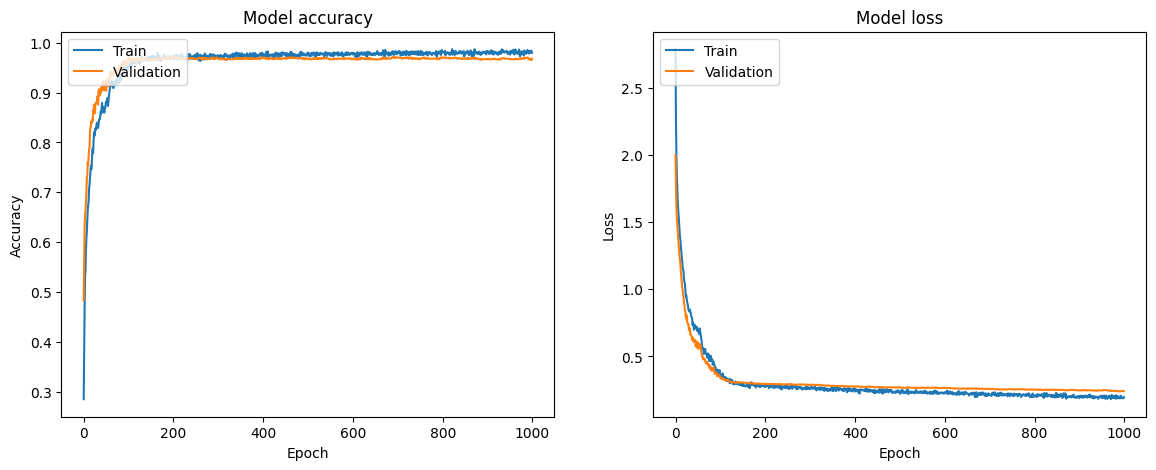

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
